In [11]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [13]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpm1zqrxfjGP2
Verbose mode active!


In [14]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Ocular_disease/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Ocular_disease/masks.npy')

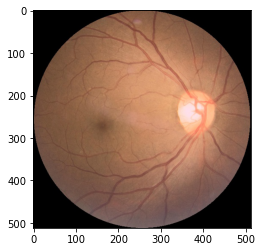

In [18]:
plt.imshow(images[8])

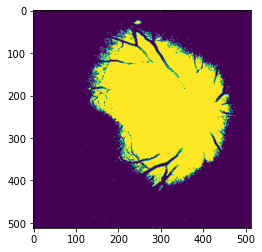

In [19]:
plt.imshow(masks[8])

In [20]:
len(images)

6392

In [23]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [25]:
#
#
R.setup_data(images, masks, dataset_size=6392, weights=weights)

Weights OK!


In [26]:
RUNS = 5

In [27]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
5/5 [==============================] - 35s 4s/step - loss: -14.6333 - dice_coeff: 1.1095 - val_loss: -14.8010 - val_dice_coeff: 1.1490
Epoch 2/100
5/5 [==============================] - 7s 2s/step - loss: -62.3095 - dice_coeff: 1.3812 - val_loss: -8.4258 - val_dice_coeff: 1.0828
Epoch 3/100
5/5 [==============================] - 7s 2s/step - loss: -89.5627 - dice_coeff: 1.5134 - val_loss: -6.0127 - val_dice_coeff: 1.0574
Epoch 4/100
5/5 [==============================] - 7s 2s/step - loss: -113.7032 - dice_coeff: 1.6238 - val_loss: -4.3699 - val_dice_coeff: 1.0400
Epoch 5/100
5/5 [==============================] - 7s 2s/step - loss: -126.9244 - dice_coeff: 1.6671 - val_loss: -3.9501 - val_dice_coeff: 1.0355
Epoch 6/100
5/5 [==============================] - 7s 2s/step - loss: -143.2804 - dice_coeff: 1.7028 - val_loss: -3.9937 - val_dice_coeff: 1.0359
Epoch 7/100
5/5 [==============================] - 7s 2s/step - loss: -149.8508 - dice_coeff: 1.7200 - val_loss: -

In [28]:
R.classifier_scores

[[-12.738248825073242, 1.1356732845306396],
 [-7.696860313415527, 1.0683743953704834],
 [-22.12611961364746, 1.1590889692306519],
 [-50.026275634765625, 1.2861887216567993],
 [-162.1009979248047, 1.753739833831787]]

In [29]:
R.discriminator_scores

[[0.8233771920204163, 0.9608355164527893],
 [1.9147565364837646, 0.8955613374710083],
 [1.5731024742126465, 0.9190600514411926],
 [1.147225022315979, 0.9295039176940918],
 [0.9759427309036255, 0.9503916501998901]]

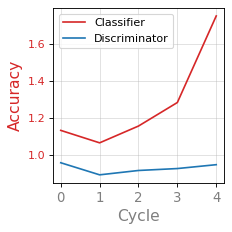

In [30]:
R.plot()